<a href="https://colab.research.google.com/github/noorhanifah/CAP-python-student-management-system/blob/main/ML_TitanicPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [ ]:
from google.colab import files 
upload = files.upload()


Saving train.csv to train.csv


In [ ]:
titanic_data = pd.read_csv('train.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


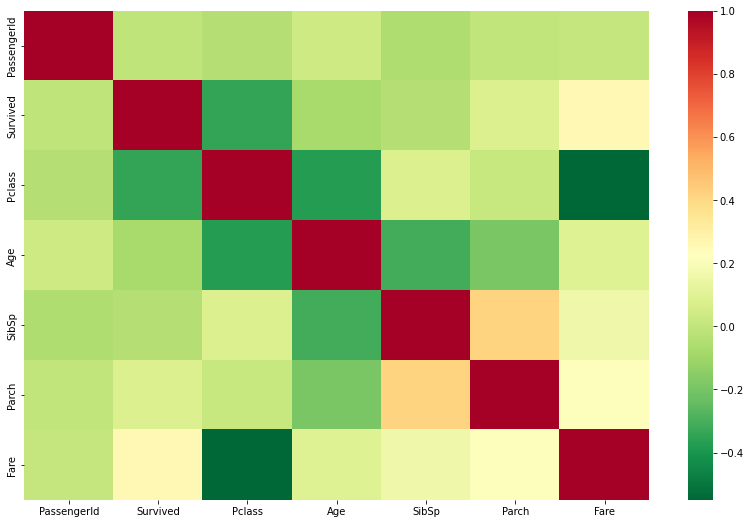

In [ ]:
plt.figure(figsize = (14,9))
ax = sns.heatmap(titanic_data.corr(), cmap = 'RdYlGn_r')

# Shows the relation of other factor to the survival 

In [ ]:
# Split and train the data (20% test, 80% train)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits =1, test_size = 0.2,)
for train_indices, test_indices in split.split(titanic_data, titanic_data[['Survived', 'Pclass', 'Sex']]):
  train_set = titanic_data.loc[train_indices]
  test_set = titanic_data.loc[test_indices]

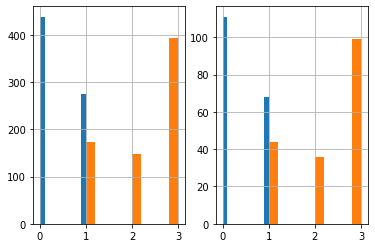

In [ ]:
plt.subplot(1,2,1)
train_set['Survived'].hist()
train_set['Pclass'].hist()

plt.subplot(1,2,2)
test_set['Survived'].hist()
test_set['Pclass'].hist()

plt.show()

# The blue bar of both of the graph area basically the same thus, the distribution is the same 

In [ ]:
train_set.info()

# There are missing values in Age, Cabin, & Embarked 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 230 to 64
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          564 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        163 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [ ]:
train_set.isnull().sum()

#Shows the sume of the null values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            148
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

In [ ]:
# Transform the Age null values

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    imputer = SimpleImputer(strategy = 'mean')
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X


In [ ]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    encoder = OneHotEncoder()
    matrix = encoder.fit_transform(X[['Embarked']]).toarray()

    column_names = ['C', 'S', 'Q', 'N']

    for i in range (len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix = encoder.fit_transform(X[['Sex']]).toarray()

    column_names = ['Female', 'Male']

    for i in range (len(matrix.T)):
      X[column_names[i]]= matrix.T[i]

    return X

In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
  
  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['Embarked', 'Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, errors = 'ignore')

In [ ]:
from sklearn.pipeline import Pipeline 

pipeline = Pipeline([('ageimputer', AgeImputer()), 
                     ('featureencoder', FeatureEncoder()),
                     ('featuredropper', FeatureDropper())])

In [ ]:
train_set = pipeline.fit_transform(train_set)

In [ ]:
train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
230,231,1,1,35.000000,1,0,83.4750,0.0,0.0,1.0,1.0,0.0
427,428,1,2,19.000000,0,0,26.0000,0.0,0.0,1.0,1.0,0.0
43,44,1,2,3.000000,1,2,41.5792,1.0,0.0,0.0,1.0,0.0
87,88,0,3,29.864362,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
695,696,0,2,52.000000,0,0,13.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
481,482,0,2,29.864362,0,0,0.0000,0.0,0.0,1.0,0.0,1.0
315,316,1,3,26.000000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
522,523,0,3,29.864362,0,0,7.2250,1.0,0.0,0.0,0.0,1.0
686,687,0,3,14.000000,4,1,39.6875,0.0,0.0,1.0,0.0,1.0


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 230 to 64
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X = train_set.drop(['Survived'], axis=1)
Y = train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy(Y)

In [ ]:
X_data

array([[-8.29568794e-01, -1.56828591e+00,  3.98925894e-01, ...,
         6.18485466e-01,  1.35941164e+00, -1.35941164e+00],
       [-6.89802571e-02, -3.70196244e-01, -8.43921428e-01, ...,
         6.18485466e-01,  1.35941164e+00, -1.35941164e+00],
       [-1.55154878e+00, -3.70196244e-01, -2.08676875e+00, ...,
        -1.61685287e+00,  1.35941164e+00, -1.35941164e+00],
       ...,
       [ 2.97801017e-01,  8.27893418e-01, -5.51935085e-16, ...,
        -1.61685287e+00, -7.35612358e-01,  7.35612358e-01],
       [ 9.30981322e-01,  8.27893418e-01, -1.23231122e+00, ...,
         6.18485466e-01, -7.35612358e-01,  7.35612358e-01],
       [-1.47047081e+00, -1.56828591e+00, -5.51935085e-16, ...,
        -1.61685287e+00, -7.35612358e-01,  7.35612358e-01]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_gird = [
              {"n_estimators": [10,100,200,500], 'max_depth': [None,5,10], 'min_samples_split': [2,3,4]}
              ]

grid_search = GridSearchCV(clf, param_gird, cv = 3, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
test_set = pipeline.fit_transform(test_set)

KeyError: ignored

In [ ]:
test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
600,601,1,2,24.0000,2,1,27.0000,0.0,0.0,1.0,1.0,0.0
570,571,1,2,62.0000,0,0,10.5000,0.0,0.0,1.0,0.0,1.0
46,47,0,3,29.0778,1,0,15.5000,0.0,1.0,0.0,0.0,1.0
100,101,0,3,28.0000,0,0,7.8958,0.0,0.0,1.0,1.0,0.0
243,244,0,3,22.0000,0,0,7.1250,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396,397,0,3,31.0000,0,0,7.8542,0.0,0.0,1.0,1.0,0.0
705,706,0,2,39.0000,0,0,26.0000,0.0,0.0,1.0,0.0,1.0
213,214,0,2,30.0000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
254,255,0,3,41.0000,0,2,20.2125,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_test = test_set.drop(['Survived'], axis=1)
Y_test = test_set['Survived']

scaler = StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()


In [ ]:
final_clf.score(X_data_test, Y_data_test)

0.8156424581005587

In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,S,Q,N,Female,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,0.0,0.0,1.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0.0,0.0,1.0,0.0,1.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0.0,0.0,1.0,0.0,1.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final = final_data.drop(['Survived'], axis=1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()

param_gird = [
              {"n_estimators": [10,100,200,500], 'max_depth': [None,5,10], 'min_samples_split': [2,3,4]}
              ]

grid_search = GridSearchCV(prod_clf, param_gird, cv = 3, scoring = 'accuracy', return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_


In [ ]:
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=200)

In [ ]:
from google.colab import files 
upload = files.upload()

Saving test.csv to test.csv


In [ ]:
titanic_test_data = pd.read_csv('test.csv')
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [ ]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Female       418 non-null    float64
 10  Male         418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [ ]:
final_test_data.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
C              0
S              0
Q              0
Female         0
Male           0
dtype: int64

In [ ]:
X_final_test = final_test_data
X_final_test = X_final_test.fillna(method = 'ffill')

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [ ]:
predictions  = prod_final_clf.predict(X_data_final_test)

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_final = pd.DataFrame(titanic_test_data['PassengerId'])
df_final['Survived']= predictions
df_final.to_csv('predictions.csv', index= False)

In [ ]:
df_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
files.download("predictions.csv") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>